<a href="https://colab.research.google.com/github/satani99/practical_deep_learning_for_coders/blob/main/fast_ai_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle
!pip install -q kaggle-cli

     |████████████████████████████████| 74 kB 2.0 MB/s 
     |████████████████████████████████| 4.2 MB 13.1 MB/s 
     |████████████████████████████████| 146 kB 55.6 MB/s 
     |████████████████████████████████| 112 kB 42.1 MB/s 
     |████████████████████████████████| 49 kB 3.4 MB/s 
  ERROR: Failed building wheel for lxml
    Running setup.py install for lxml ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-cplkn0tu/lxml_88faf51598ed4b119febfb449af18d89/setup.py'"'"'; __file__='"'"'/tmp/pip-install-cplkn0tu/lxml_88faf51598ed4b119febfb449af18d89/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-ejt_ew6f/install-record.txt --s

In [2]:
import os
os.environ['KAGGLE_USERNAME'] = 'XXX'
os.environ['KAGGLE_KEY'] = 'XXX'

In [3]:
%%bash
mkdir /content/data
cd /content/data
kaggle datasets download -d hoturam/bear-dataset --unzip

100%|██████████| 7.68M/7.68M [00:00<00:00, 89.5MB/s]


In [4]:
from fastai.vision.all import *

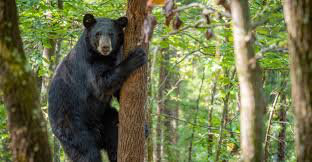

In [5]:
im = Image.open('/content/data/data/black/black1.jpg')
im

In [6]:
bear_types = 'grizzly', 'black', 'teddy', 'panda', 'polar'

In [7]:
path = Path('/content/data/data')
fns = get_image_files(path)
fns

(#309) [Path('/content/data/data/polar/polar_bear78.jpg'),Path('/content/data/data/polar/polar_bear12.jpg'),Path('/content/data/data/polar/polar_bear20.jpg'),Path('/content/data/data/polar/polar_bear64.jpg'),Path('/content/data/data/polar/polar_bear24.jpg'),Path('/content/data/data/polar/polar_bear99.jpg'),Path('/content/data/data/polar/polar_bear34.jpg'),Path('/content/data/data/polar/polar_bear6.jpg'),Path('/content/data/data/polar/polar_bear95.jpg'),Path('/content/data/data/polar/polar_bear84.jpg')...]

In [8]:
failed = verify_images(fns)
failed

(#0) []

In [9]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128)
)

In [10]:
dls = bears.dataloaders(path)

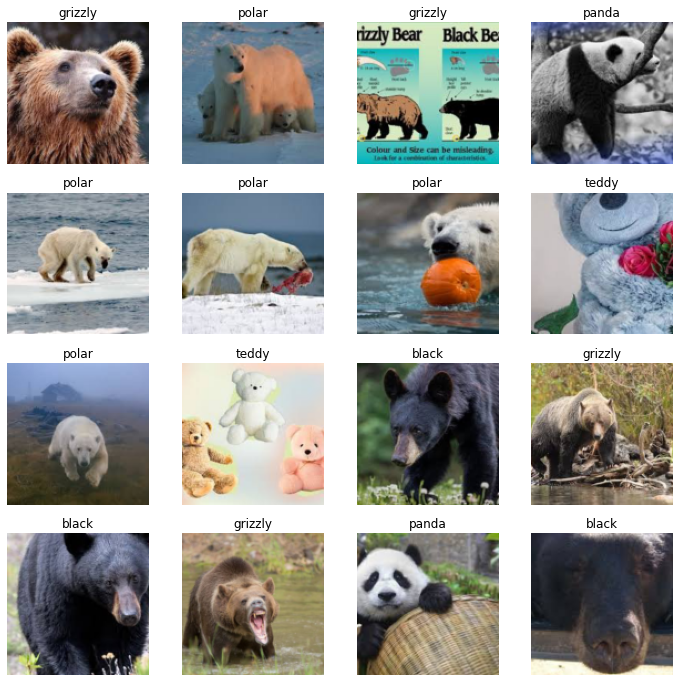

In [11]:
dls.valid.show_batch(max_n=16, nrows=4)

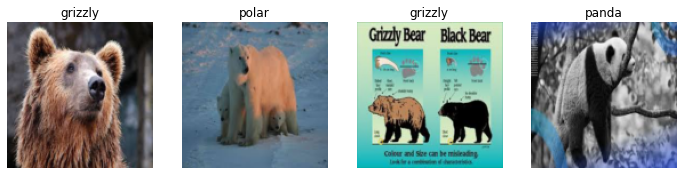

In [12]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)
                      

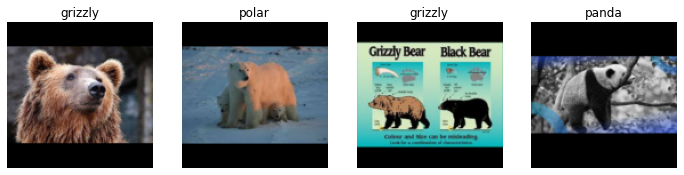

In [13]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = bears.dataloaders(path) 
dls.valid.show_batch(max_n=4, nrows=1)

In [14]:
doc(Resize)

Resize(self, size, method='crop', pad_mode='reflection', resamples=(2, 0), **kwargs)
A transform that before_call its state at each `__call__`

To get a prettier result with hyperlinks to source code and documentation, install nbdev: pip install nbdev


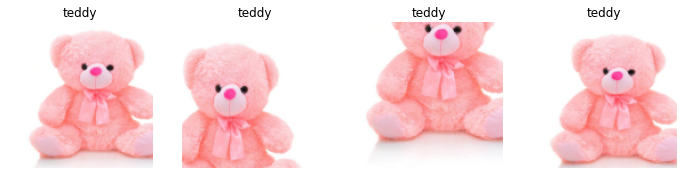

In [15]:
bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

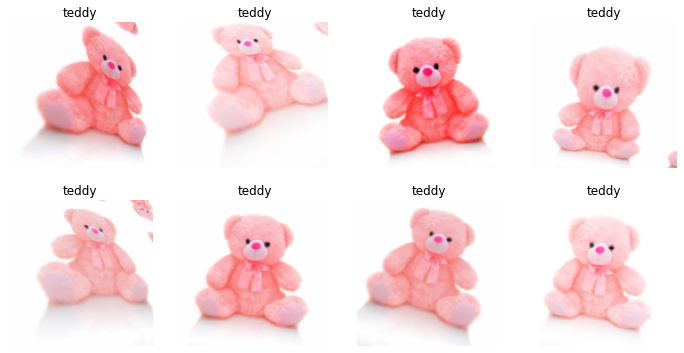

In [16]:
bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [17]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears.dataloaders(path)

In [18]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:265: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

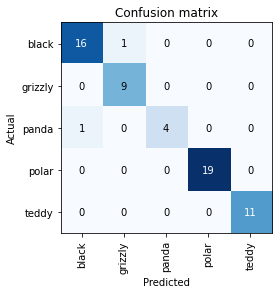

In [19]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

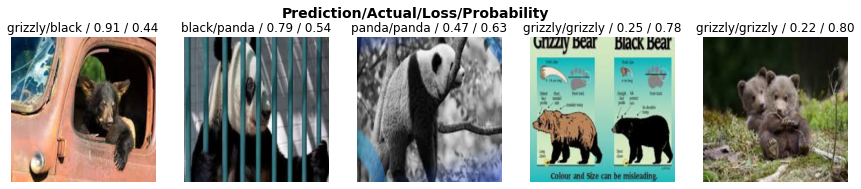

In [20]:
interp.plot_top_losses(5, nrows=1)

In [21]:
from fastai.vision.widgets import *
# from utils import *

In [22]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [23]:
for idx in cleaner.delete():
  cleaner.fns[idx].unlink()

In [24]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears.dataloaders(path)

In [25]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:265: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


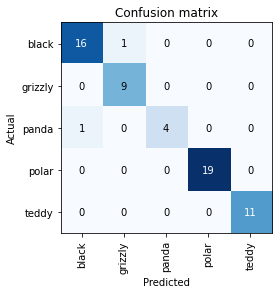

In [26]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

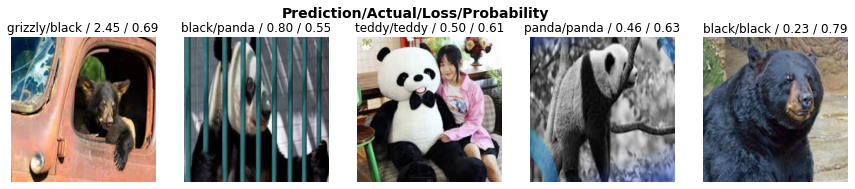

In [27]:
interp.plot_top_losses(5, nrows=1)

In [30]:
learn.export()

In [31]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [32]:
learn_inf = load_learner(path/'export.pkl')

In [33]:
learn_inf.predict('/content/data/data/panda/panda1.jpg')

('panda',
 TensorBase(2),
 TensorBase([1.2244e-05, 3.1161e-05, 9.9967e-01, 1.7412e-05, 2.6628e-04]))

In [34]:
learn_inf.dls.vocab

['black', 'grizzly', 'panda', 'polar', 'teddy']

In [36]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [38]:
img = PILImage.create(btn_upload.data[-1])

In [39]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128, 128))
out_pl

Output()

In [40]:
pred, pred_idx, probs = learn_inf.predict(img)

In [41]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: grizzly; Probability: 1.0000')

In [42]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [43]:
def on_click_classify(change):
  img = PILImage.create(btn_upload.data[-1])
  out_pl.clear_output()
  with out_pl: display(img.to_thumb(128, 128))
  pred, pred_idx, probs = learn_inf.predict(img)
  lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [45]:
VBox([widgets.Label('Select your bear!'),
      btn_upload, btn_run, out_pl, lbl_pred])